In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
MLR = LinearRegression()

In [3]:
base = pd.read_csv('../../Data/BaseData.csv')

In [4]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [5]:
len(y)

2580

In [6]:
X.shape

(2580, 298)

In [7]:
X.shape[1]

298

In [8]:
AR2_Base = []
MAE_Base = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    MLR.fit(X_train, y_train)
    pred = MLR.predict(X_test)
    
    Adj_r2 = 1 - (1-r2_score(y_test, pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Base.append(Adj_r2)
    
    mae = mean_absolute_error(y_test, pred)
    MAE_Base.append(mae)

In [9]:
PositiveAR2 = []
NegativeAR2 = []

for i in AR2_Base:
    if i < 0:
        NegativeAR2.append(i)
    else:
        PositiveAR2.append(i)

In [10]:
len(NegativeAR2)

16

In [11]:
Base = pd.DataFrame({'AR2_Base': AR2_Base, 'MAE_Base': MAE_Base})

In [12]:
Base

,AR2_Base,MAE_Base
0,9.201519e-01,1.345523e+04
1,9.019816e-01,1.456102e+04
2,8.805261e-01,1.471371e+04
3,9.136521e-01,1.385539e+04
4,-2.509746e+07,1.319546e+07
...,...,...
95,8.240067e-01,1.578435e+04
96,8.576802e-01,1.548012e+04
97,8.834353e-01,1.525980e+04
98,8.425331e-01,1.460366e+04


In [13]:
Base = Base[Base.AR2_Base > 0]
Base

,AR2_Base,MAE_Base
0,0.920152,13455.227044
1,0.901982,14561.022975
2,0.880526,14713.706727
3,0.913652,13855.391262
6,0.852769,15091.498584
...,...,...
95,0.824007,15784.354816
96,0.857680,15480.117571
97,0.883435,15259.799793
98,0.842533,14603.659524


In [14]:
base_drop1 = pd.read_csv('BaseDrop1.csv')

In [15]:
base_drop1.shape

(2579, 299)

In [16]:
X2 = base_drop1.drop(['SalePrice'], axis=1).values
y2 = base_drop1.SalePrice.values

In [17]:
len(y2)

2579

In [18]:
X2.shape

(2579, 298)

In [19]:
X2.shape[1]

298

In [20]:
AR2_Drop1 = []
MAE_Drop1 = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size=0.25)
    MLR.fit(X_train, y_train)
    pred = MLR.predict(X_test)
    
    Adj_r2 = 1 - (1-r2_score(y_test, pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Drop1.append(Adj_r2)
    
    mae = mean_absolute_error(y_test, pred)
    MAE_Drop1.append(mae)

In [21]:
BaseDrop1 = pd.DataFrame({'AR2_Drop1': AR2_Drop1, 'MAE_Drop1': MAE_Drop1})

In [22]:
BaseDrop1

,AR2_Drop1,MAE_Drop1
0,9.030700e-01,1.479184e+04
1,9.141881e-01,1.414109e+04
2,9.187674e-01,1.362107e+04
3,9.120741e-01,1.486638e+04
4,9.122875e-01,1.416408e+04
...,...,...
95,9.096001e-01,1.411787e+04
96,8.450432e-01,1.543359e+04
97,9.097918e-01,1.475587e+04
98,-9.384276e+06,8.503759e+06


In [23]:
BaseDrop1 = BaseDrop1[BaseDrop1.AR2_Drop1 > 0]
BaseDrop1

,AR2_Drop1,MAE_Drop1
0,0.903070,14791.839117
1,0.914188,14141.093036
2,0.918767,13621.066272
3,0.912074,14866.375424
4,0.912288,14164.075129
...,...,...
94,0.919477,13977.835490
95,0.909600,14117.867131
96,0.845043,15433.585924
97,0.909792,14755.866279


In [24]:
base_drop_IF = pd.read_csv('BaseDropIF.csv')
base_drop_IF.shape

(2568, 299)

In [25]:
X3 = base_drop_IF.drop(['SalePrice'], axis=1).values
y3 = base_drop_IF.SalePrice.values

In [26]:
AR2_DropIF = []
MAE_DropIF = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X3,y3,test_size=0.25)
    MLR.fit(X_train, y_train)
    pred = MLR.predict(X_test)
    
    Adj_r2 = 1 - (1-r2_score(y_test, pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_DropIF.append(Adj_r2)
    
    mae = mean_absolute_error(y_test, pred)
    MAE_DropIF.append(mae)

In [27]:
BaseDropIF = pd.DataFrame({'AR2_DropIF': AR2_DropIF, 'MAE_DropIF': MAE_DropIF})
BaseDropIF

,AR2_DropIF,MAE_DropIF
0,8.967654e-01,1.442996e+04
1,-1.272156e+05,9.458717e+05
2,8.907753e-01,1.482928e+04
3,-2.066443e+07,1.253451e+07
4,9.163188e-01,1.415705e+04
...,...,...
95,8.848501e-01,1.533293e+04
96,8.964696e-01,1.445394e+04
97,9.002782e-01,1.371966e+04
98,9.144088e-01,1.394308e+04


In [28]:
BaseDropIF = BaseDropIF[BaseDropIF.AR2_DropIF > 0]
BaseDropIF

,AR2_DropIF,MAE_DropIF
0,0.896765,14429.957287
2,0.890775,14829.284481
4,0.916319,14157.051847
5,0.905197,13794.803455
6,0.919257,13763.865115
...,...,...
95,0.884850,15332.933145
96,0.896470,14453.939648
97,0.900278,13719.661135
98,0.914409,13943.084030


In [29]:
box = pd.concat([Base, BaseDrop1, BaseDropIF], axis=1)
box

,AR2_Base,MAE_Base,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
0,0.920152,13455.227044,0.903070,14791.839117,0.896765,14429.957287
1,0.901982,14561.022975,0.914188,14141.093036,NaN,NaN
2,0.880526,14713.706727,0.918767,13621.066272,0.890775,14829.284481
3,0.913652,13855.391262,0.912074,14866.375424,NaN,NaN
4,NaN,NaN,0.912288,14164.075129,0.916319,14157.051847
...,...,...,...,...,...,...
95,0.824007,15784.354816,0.909600,14117.867131,0.884850,15332.933145
96,0.857680,15480.117571,0.845043,15433.585924,0.896470,14453.939648
97,0.883435,15259.799793,0.909792,14755.866279,0.900278,13719.661135
98,0.842533,14603.659524,NaN,NaN,0.914409,13943.084030


In [30]:
box.describe()

,AR2_Base,MAE_Base,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
count,84.000000,84.000000,84.000000,84.000000,80.000000,80.000000
mean,0.875751,14880.884720,0.904858,14466.796527,0.900871,14454.383146
std,0.042945,755.284642,0.020578,626.505548,0.019078,552.124986
min,0.702361,13413.523582,0.783395,13305.678307,0.829249,13481.812152
25%,0.847253,14335.392182,0.902562,14046.148498,0.895879,14002.852548
50%,0.894020,14788.555355,0.910323,14265.731521,0.905194,14435.289060
75%,0.907311,15424.895536,0.915818,14877.386922,0.912923,14833.774946
max,0.924690,16798.625850,0.923745,16654.312884,0.923558,15769.271266


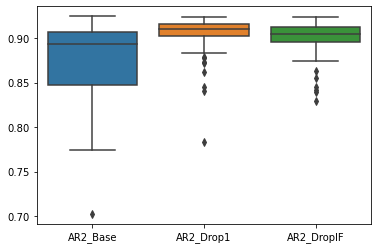

In [31]:
sns.boxplot(data=box[['AR2_Base','AR2_Drop1', 'AR2_DropIF']]);

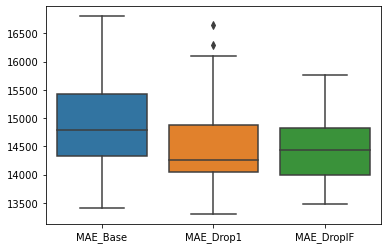

In [32]:
sns.boxplot(data=box[['MAE_Base', 'MAE_Drop1', 'MAE_DropIF']]);